# Laboratorio 1
**Autores**: Harvey Benitez, Estefanía Laverde

In [3]:
!pip install opencv-python --quiet


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import numpy as np
import cv2
# from google.colab.patches import cv2_imshow # Uncomment if running in colab
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Save images path
images_path = "drive/MyDrive/Vision por Computadora MISIS/Laboratorios/Taller1/images" # running in colab
images_path = "images/" # running locally
os.listdir(images_path)

['SPOT.png',
 'MUSCLE.png',
 'REGLE.png',
 'BUREAU.png',
 'CLEF.png',
 'RONDELLE.png',
 'SCANNER.png',
 'TORAX.png',
 'AQUITAIN.png']

# 1. Análisis del Histograma

In [4]:
# definimos una función para leer y mostrar las imágenes
def read_and_show_image_gray_scale(image_path:str, colab:bool = False):
    """
    Lee una imagen en escala de grises y la muestra.
    
    Parámetros:
    image_path (str): Ruta de la imagen a leer.
    colab (bool): Indica si se está ejecutando en Google Colab.

    Retorna:
    image (numpy.ndarray): Imagen leída en escala de grises.
    """

    # leer la imagen
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # mostrar la imagen
    if colab:
        from google.colab.patches import cv2_imshow
        cv2_imshow(image)
    else:
        plt.imshow(image, cmap='gray', vmin=0, vmax=255)
        plt.axis('off')
        plt.show()

    return image

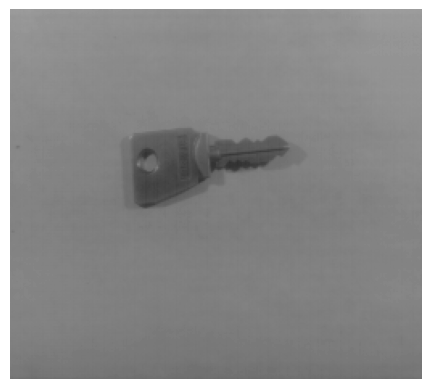

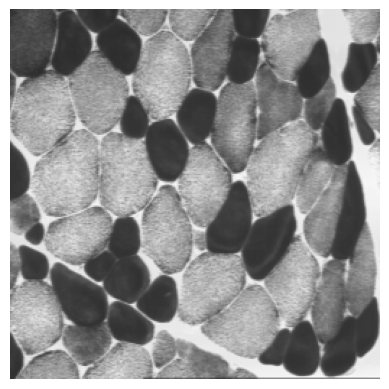

In [20]:
# lectura y carga de las imágenes
image_clef = read_and_show_image_gray_scale(os.path.join(images_path, 'CLEF.png'))

image_muscle = read_and_show_image_gray_scale(os.path.join(images_path, 'MUSCLE.png'))

In [5]:
# definimos una nueva función que calcula el histograma de una imagen
def calculate_histogram(image:np.ndarray, min_val:int = 0, max_val:int = 255, hist_title:str = "") -> np.ndarray:
    """
    Calcula el histograma de una imagen en escala de grises y grafica el resultado.

    Parámetros:
    image (numpy.ndarray): Imagen en escala de grises.
    min_val (int): Valor mínimo para el rango del histograma.
    max_val (int): Valor máximo para el rango del histograma.
    hist_title (str): Título para el gráfico del histograma.

    Retorna:
    histogram (numpy.ndarray): Histograma de la imagen.
    """
    # calcular el histograma
    histogram = cv2.calcHist([image], [0], None, [256], [min_val, max_val + 1])
    
    # plotear el histograma
    plt.plot(histogram)
    plt.xlim([min_val-10, max_val+10])
    if hist_title:
        plt.title(hist_title)
    plt.show()

    return histogram

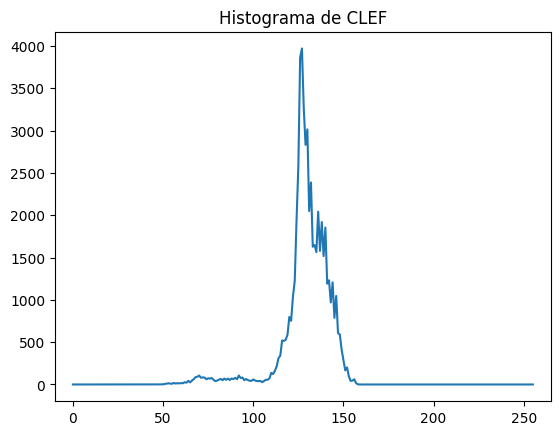

In [41]:
clef_histogram = calculate_histogram(image_clef, hist_title="Histograma de CLEF")

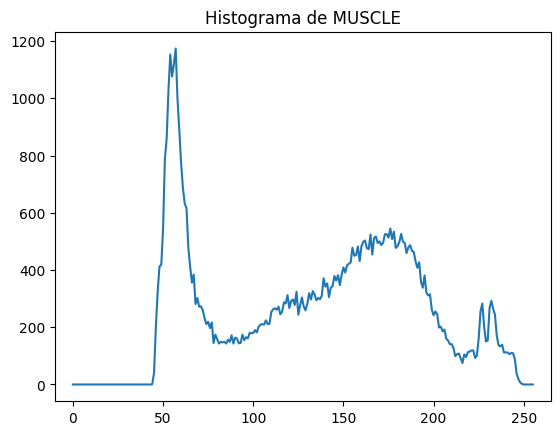

In [42]:
muscle_histogram = calculate_histogram(image_muscle, hist_title="Histograma de MUSCLE")

In [29]:
print(image_clef.shape,image_muscle.shape)

(230, 256) (256, 256)


- Explique las formas de cada uno de estos histogramas.
  
  El histograma muestra la distribución de los niveles de intensidad de píxeles en las imagenes, donde el eje $x$ indica los valores de intensidad (de 0 a 255 para imágenes en escala de grises) y el eje $y$ representa la cantidad de píxeles que tienen cada valor de intensidad.

  En la imagen CLEF, el histograma muestra una distribución muy concentrada entre los valores 100 y 150 aproximadamente, indicando que la gran mayoría de los píxeles tienen intensidades en este rango, sugiriendo que la imagen es predominante en tonos grises medios. Como se puede observar en la imagen original, el área predominante es el fondo gris, y la figura de la llave tiene también tonos grises ligeramente más oscuros, lo cual se puede ver reflejado en el histograma entre los valores 70 y 100 aproximadamente.

  Por otro lado, en la imagen MUSCLE, el histograma muestra una distribución más amplia, con una cantidad significativa de pixeles en valores oscuros (pico cercano a 50), una distribución considerable en tonos no extremos (entre 90 a 200 aproximadamente) y un pequeño pico en los valores más claros (cerca de 220-230 aproximadamente). Esto indica que la imagen tiene una mayor variedad de tonos, que se puede ver en las fibras de tono gris, un pico en valores oscuros debido a las fibras más oscuras y el pequeño pico en valores claros debido principalmente al fondo blanco de la imagen.

- Observando únicamente el histograma de muscle.png, ¿cómo se puede determinar cuáles fibras musculares son más densas (ocupan una superficie más grande en la imagen) entre las rojas (oscuras) y las blancas (grises)? Y ¿cuáles fibras tienen un color más uniforme (más homogéneo)?

  Observando únicamente el histograma y teniendo en cuenta la descripción previa, las fibras musculares que ocupan una mayor superficie en la imagen son las fibras de tonos grises (blancas), pues a pesar de que hay un pico en los valores oscuros (fibras rojas), la distribución en los tonos medios (grises) es más amplia y tiene una mayor cantidad de píxeles en comparación con los tonos oscuros. Esto sugiere que las fibras musculares de tonos grises son más densas en la imagen.

  En cuanto a la uniformidad del color, las fibras musculares oscuras (rojas) parecen tener un color más uniforme, pues su distribución en el histograma se concentra en un rango más estrecho de valores, cercanos a 50. En contraste, las fibras musculares de tonos grises (blancas) tienen una distribución más amplia en el histograma, lo que indica una mayor variabilidad en los tonos presentes en esas fibras.
---

# 2. Operaciones aritméticas

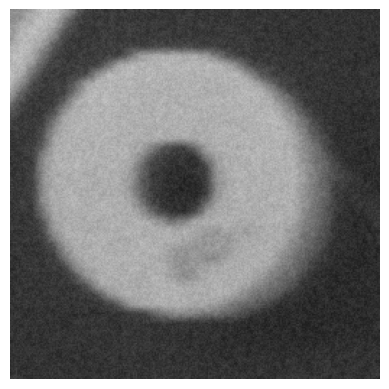

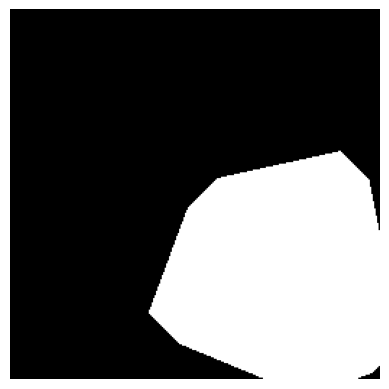

In [30]:
rondelle_image = read_and_show_image_gray_scale(os.path.join(images_path, 'RONDELLE.png'))
spot_image = read_and_show_image_gray_scale(os.path.join(images_path, 'SPOT.png'))

In [31]:
# comprobamos que las imagenes leídas sean de 8 bits
print(rondelle_image.dtype, spot_image.dtype)

uint8 uint8


In [32]:
# pasamos las imágenes a 16 bits haciendo una conversión
rondelle_image_16bit = rondelle_image.astype(np.uint16)
spot_image_16bit = spot_image.astype(np.uint16)

# comprobamos que las imagenes convertidas sean de 16 bits
print(rondelle_image_16bit.dtype, spot_image_16bit.dtype)

uint16 uint16


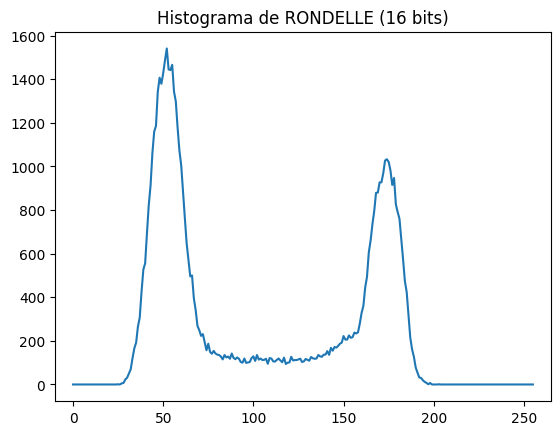

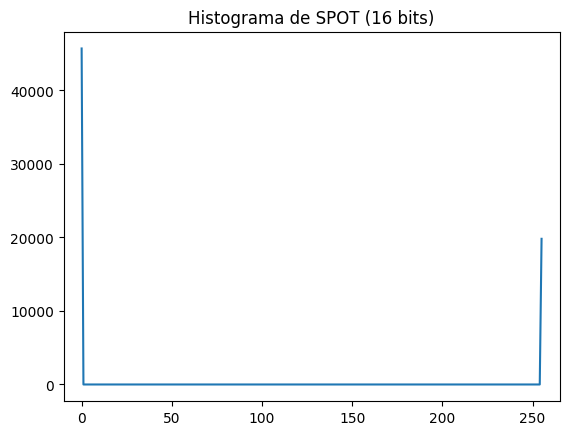

In [43]:
# visualizamos el histograma de ambas imagenes de 16 bits
rondelle_histogram_16bit = calculate_histogram(rondelle_image_16bit, hist_title="Histograma de RONDELLE (16 bits)")

# visualizamos el histograma de spot
spot_histogram_16bit = calculate_histogram(spot_image_16bit, hist_title="Histograma de SPOT (16 bits)")

- Explique las formas de cada uno de estos histogramas.

    El histograma referente a la imagen RONDELLE (16 bits) muestra dos concentraciones principales de píxeles: una en valores cercanos a 50 (oscuros) y otra en valores cercanos a 170 aproximadamente (claros), siendo predominantes los valores oscuros. Observando la imagen original, se puede ver que los valores claros corresponden a la figura redonda de tono más claro, y los valores oscuros al fondo en el que está la figura. Además, hay un ruido ligeramente visible en la imagen, que se refleja en el histograma como una dispersión de valores entre los picos principales.

    En el caso del histograma de la imagen SPOT (16 bits),hay únicamente dos valores de intensidad predominantes: uno en el color negro (0) y otro en blanco (255), indicando que la imagen tiene únicamente dos tonos en todos los pixeles. Esto se puede observar en la imagen, pues se tiene únicamente un fondo completamente negro y una mancha completamente blanca.

    Como nota adicional, al realizar la conversión incrementando los bits de 8 a 16, los valores de intensidad no fueron afectados, pero el máximo de intensidades puede ser incrementado hasta 65536.

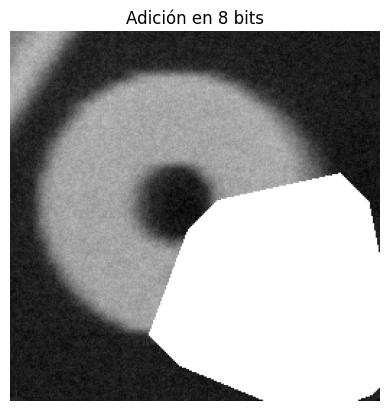

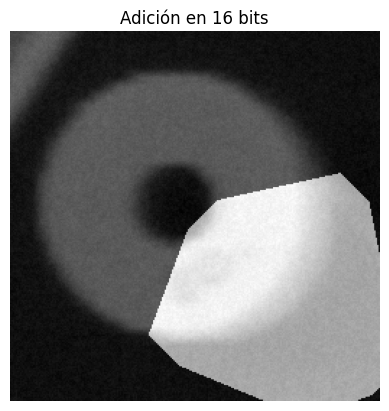

In [48]:
# Adicionando rondelle a spot en 8 bits y en 16 bits
addition = cv2.add(rondelle_image, spot_image)

plt.imshow(addition, cmap='gray')
plt.title("Adición en 8 bits")
plt.axis('off')
plt.show()

addition_16bit = cv2.add(rondelle_image_16bit, spot_image_16bit)

plt.imshow(addition_16bit, cmap='gray')
plt.title("Adición en 16 bits")
plt.axis('off')
plt.show()

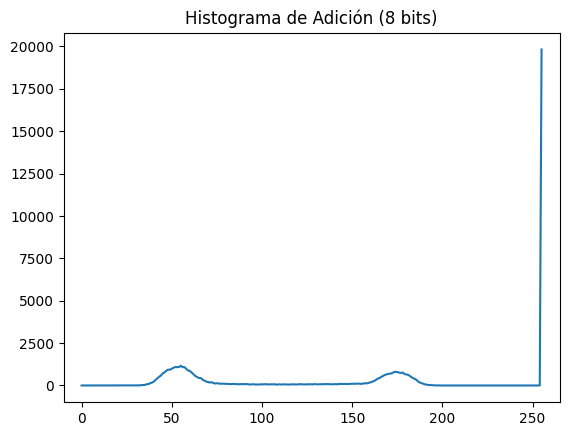

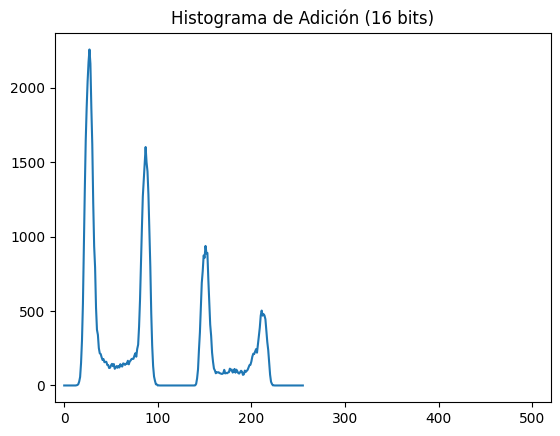

In [50]:
# visualizamos los histogramas de las imagenes resultantes de adición
addition_histogram = calculate_histogram(addition, hist_title="Histograma de Adición (8 bits)")
addition_16bit_histogram = calculate_histogram(addition_16bit, hist_title="Histograma de Adición (16 bits)", min_val=0, max_val=255*2)

- Justifique los valores de los niveles de gris de esta imagen. 

    El resultado de la operación adición se obtiene sumando los valores de intensidad entre pixeles en las mismas posiciones entre ambas imágenes. Teniendo en cuenta que la imagen SPOT tiene únicamente como valores de intensidad el negro (0) y el blanco (255), el resultado actúa de forma distinta según la profunidad de bits de las imagenes. En 8 bits, cualquier suma que supere el valor de 255 se trunca automáticamente a este límite, generando que la mancha blanca de la imagen SPOT se vea en la suma, y el resto de la imagen queda igual a RONDELLE pues se le está sumando 0. En cambio, en 16 bits, el límite máximo se extiende hasta 65535, luego la suma de intensidades no se verá truncada. Esto hace que la suma obtenida tome tonos claros nuevos, sin llegar al punto de truncamiento, y manteniendo las figuras originales de la imagen RONDELLE.
    Estos resultados se pueden también observar en los histogramas de las imagenes, teniendo para 8 bits un nuevo pico en los tonos blancos (255) debido al truncamiento, y reduciendo el numero de pixeles que estaban en la distribución del histograma de la imagen original. En el caso de los 16 bits, se observa como aparecen dos nuevos picos, trasladando algunos de los pixeles correspondientes a la mancha blanca de SPOT a nuevos tonos claros, sin llegar al truncamiento.

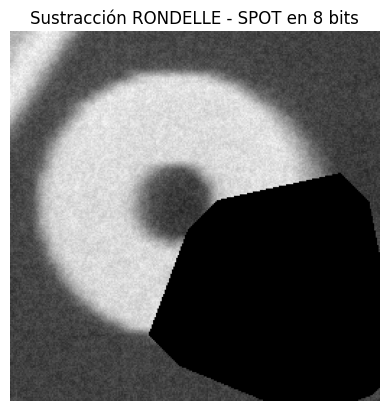

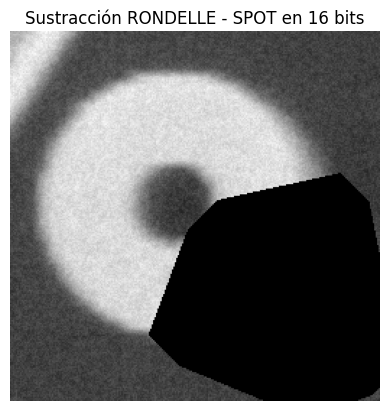

In [56]:
# Sustracción rondelle - spot en 8 bits y en 16 bits
subtract_rondelle_minus_spot = cv2.subtract(rondelle_image, spot_image)

plt.imshow(subtract_rondelle_minus_spot, cmap='gray')
plt.title("Sustracción RONDELLE - SPOT en 8 bits")
plt.axis('off')
plt.show()

subtract_rondelle_minus_spot_16bit = cv2.subtract(rondelle_image_16bit, spot_image_16bit)
plt.imshow(subtract_rondelle_minus_spot_16bit, cmap='gray')
plt.title("Sustracción RONDELLE - SPOT en 16 bits")
plt.axis('off')
plt.show()

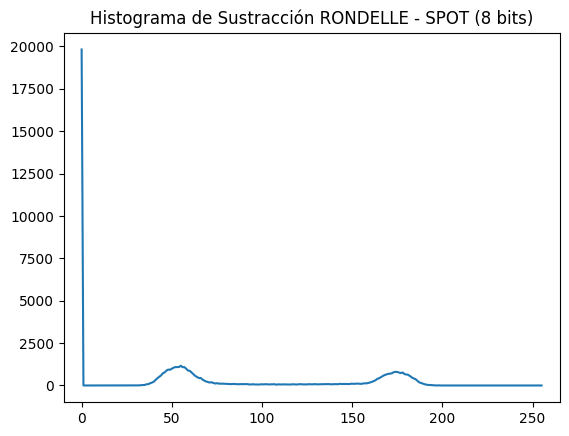

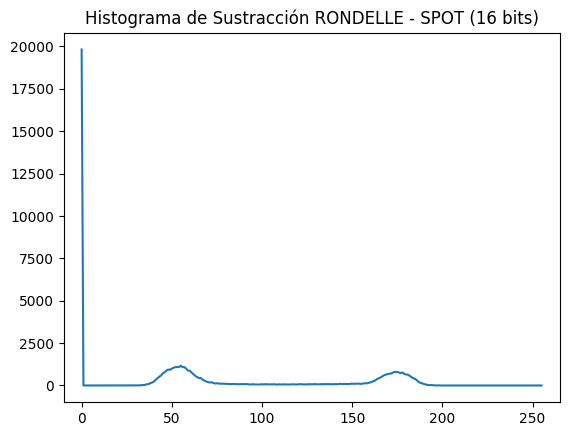

In [57]:
# visualizamos el histograma de ambas imagenes al hacer la sustracción
subtract_histogram = calculate_histogram(subtract_rondelle_minus_spot, hist_title="Histograma de Sustracción RONDELLE - SPOT (8 bits)")
subtract_16bit_histogram = calculate_histogram(subtract_rondelle_minus_spot_16bit, hist_title="Histograma de Sustracción RONDELLE - SPOT (16 bits)", min_val=0, max_val=255)

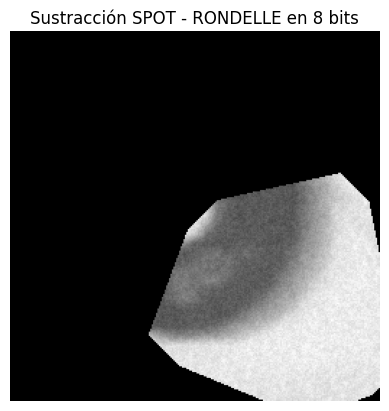

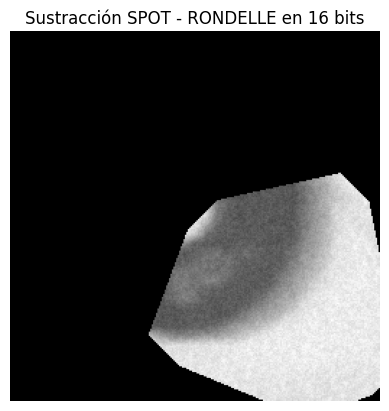

In [58]:
# Sustracción SPOT - RONDELLE en 8 bits y en 16 bits
subtract_spot_minus_rondelle = cv2.subtract(spot_image, rondelle_image)

plt.imshow(subtract_spot_minus_rondelle, cmap='gray')
plt.title("Sustracción SPOT - RONDELLE en 8 bits")
plt.axis('off')
plt.show()

subtract_spot_minus_rondelle_16bit = cv2.subtract(spot_image_16bit, rondelle_image_16bit)
plt.imshow(subtract_spot_minus_rondelle_16bit, cmap='gray')
plt.title("Sustracción SPOT - RONDELLE en 16 bits")
plt.axis('off')
plt.show()

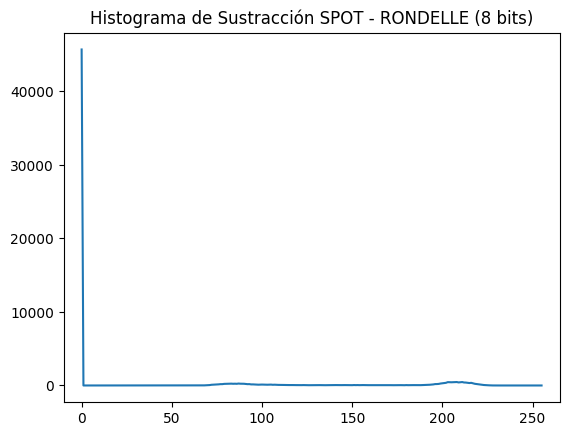

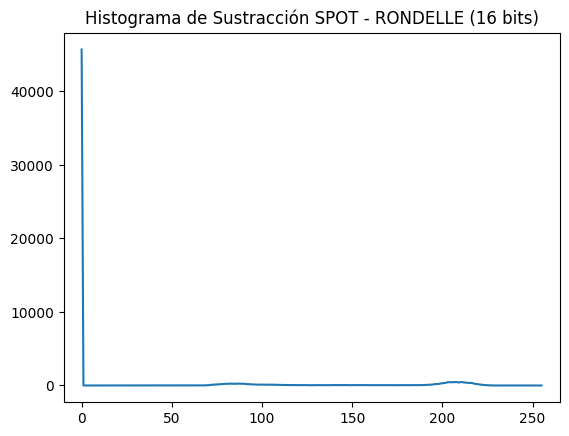

In [59]:
# visualizamos el histograma de ambas imagenes al hacer la sustracción
subtract_histogram = calculate_histogram(subtract_spot_minus_rondelle, hist_title="Histograma de Sustracción SPOT - RONDELLE (8 bits)")
subtract_16bit_histogram = calculate_histogram(subtract_spot_minus_rondelle_16bit, hist_title="Histograma de Sustracción SPOT - RONDELLE (16 bits)", min_val=0, max_val=255)

- ¿Cómo afecta al resultado la inversión de los operandos?

    Al invertir los operandos en la operación de sustracción, se produce un efecto de selección u omisión de áreas en la imagen resultante. Cuando a RONDELLE se le resta SPOT, los píxeles correspondientes a la mancha blanca de spot (valor 255) se truncan en 0 en la imagen resultate, obteniendo una mancha negra en la posición correspondiente, mientras que el resto de la imagen permanece igual a RONDELLE. Por otro lado, cuando a SPOT se le resta RONDELLE, el fondo negro de SPOT (valor 0) resta cualquier valor de RONDELLE y queda truncado en 0, obteniendo el mismo fondo negro, mientras que a la mancha blanca (valor 255) se le restan los valores de intensidad de la imagen RONDELLE, obteniendo un cambio en los tonos tornandose más claros, pero conteniendo la figura de RONDELLE.

    En los histogramas se puede visualizar como hay grandes cantidades de tonos negros (0) en ambas operaciones, siendo mayores en la operación SPOT-RONDELLE. Además, se puede observar ese cambio de tonos a valores más claros mencionado sobre la operación SPOT-RONDELLE, pues hay dos pequeños picos que fueron movidos hacia valores más altos al compararlos con el histograma de la imagen RONDELLE original.

    Es importante notar que al estar restando, el valor mínimo tanto para 8 bits como para 16 bits es de 0, por lo que se observan los mismo resultados en ambas situaciones.

- Conociendo únicamente los histogramas de las imágenes operandos (y no las imágenes mismas), ¿es posible prever el histograma de la imagen que se obtendrá con una operación aritmética sobre estas imágenes operandos? ¿Por qué?

    Conociendo únicamente los histogramas de la imagen y no las imagenes en si no es posible prever el histograma de la imagen tras las operaciones aritmeticas, pued carecen de información espacial, dado que el histograma indica una frecuencia o distribución de cada nivel de gris pero no la ubicación de los pixeles dentro de la imagen. Como las operaciones aritméticas se realizan pixel a pixel según su posición, el resultado final depende de esa disposición espacial. Por ejemplo, sumar un tonos claros puede llegar a truncarse, pero si se suma un tono claro con un tono oscuro, se creará un nuevo tono intermedio.

---   


# 3. Negativo


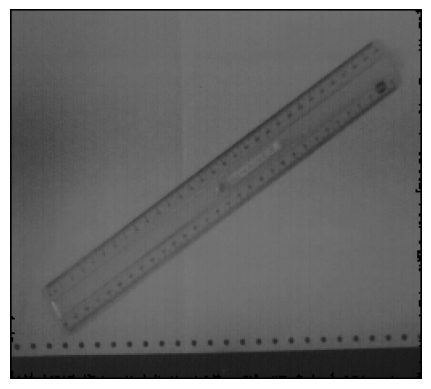

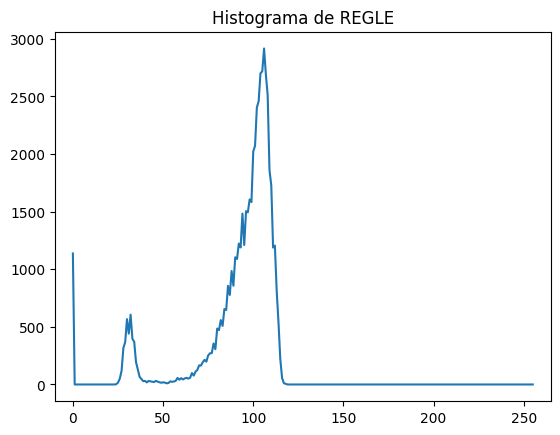

In [60]:
# visualización de la imagen y del histograma
image_regle = read_and_show_image_gray_scale(os.path.join(images_path, "REGLE.png"))
regle_histogram = calculate_histogram(image_regle, hist_title="Histograma de REGLE")

- Explicación del histograma.

    El histograma de la imagen REGLE muestra una importante cantidad de tonos negros (0) que se puede observar en los bordes de la imagen. Hay otros dos picos, uno en tonos cercanos a 30 (más pequeño) que puede deberse al fondo en el que se encuentra la hoja de papel en la imagen, y uno más grande y más distribuido alrededor de 100 que indica tonos grises oscuros. Se puede notar que los valores entre 50 y 100 aproximadamente están más distribuidos en los pixeles que de 100 a 120 aproximadamente, lo cual se podría explicar por la sombra de tonos más oscuros que crea la regla en la hoja.

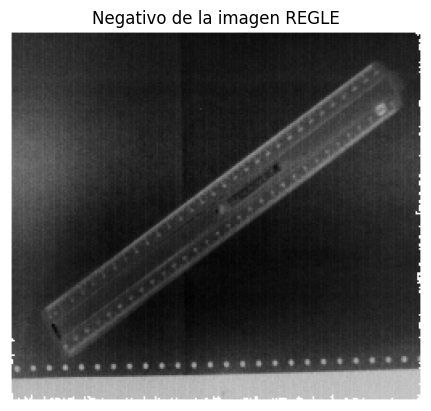

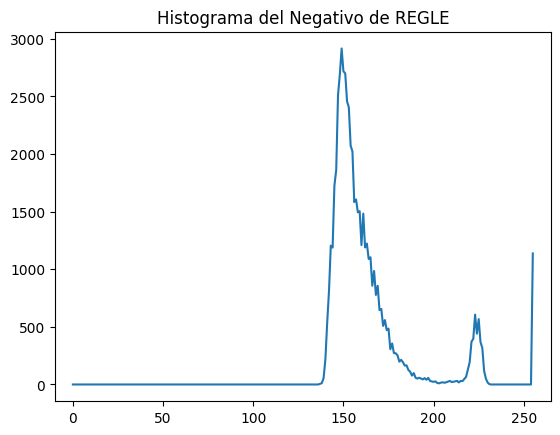

In [64]:
# Negativo de la imagen
negative_regle = cv2.bitwise_not(image_regle)

plt.imshow(negative_regle, cmap='gray')
plt.title("Negativo de la imagen REGLE")
plt.axis('off')
plt.show()

# histogrtama del negativo
negative_regle_histogram = calculate_histogram(negative_regle, hist_title="Histograma del Negativo de REGLE")

- ¿Cómo es este histograma con respecto al de la imagen original?
  
    La operación bitwise_not transforma el valor de intensidad de cada píxel $I$ en un nuevo valor $255-I$, por lo que valores que estaban en el extremo oscuro se desplazan al extremo claro, y viceversa. Al analizar ambos histogramas, se puede ver una reflexión en el eje horizontal sobre el valor 127.5 (que es la mitad de 255).

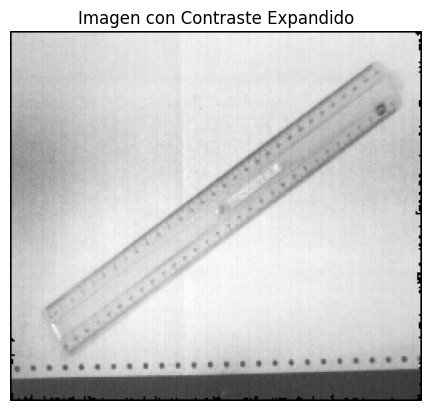

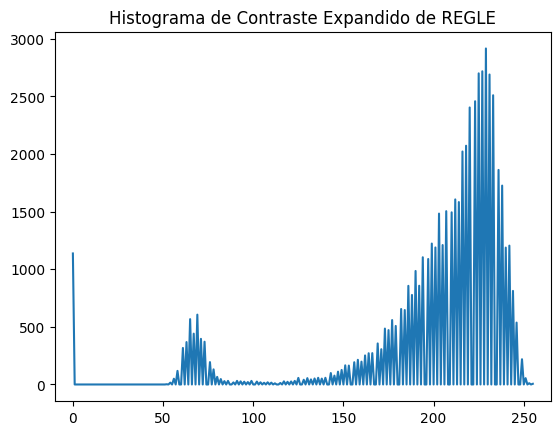

In [67]:
# Expansión del histograma - contraste
# consiste en remapear los valores de la imagen para que ocupen todo el rango posible (0-255 para 8 bits)

# expansion de la imagen original
expanded_contrast_regle = cv2.normalize(image_regle, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

plt.imshow(expanded_contrast_regle, cmap='gray')
plt.title("Imagen con Contraste Expandido")
plt.axis('off')
plt.show()

# histograma del contraste expandido
expanded_contrast_histogram = calculate_histogram(expanded_contrast_regle, hist_title="Histograma de Contraste Expandido de REGLE")

- Explique el resultado.

    Al hacer una expansión del histograma, se remapean los valores de intensidad de la imagen para que ocupen todo el rango posible (0-255 para 8 bits). Esto se logra identificando los valores mínimo y máximo de intensidades en la imagen original, y luego transformandolos de la siguiente manera:

    $$I_{new} = \frac{(I - I_{min})}{(I_{max} - I_{min})} \cdot 255$$

    De forma que el valor mínimo se convierte en 0 y el máximo en 255, y los demás valores se distribuyen linealmente entre estos extremos.

    En el histograma resultante se puede observar que los valores de intensidad ocupan todo el rango de 0 a 255, a diferencia del histograma original, que estaba concentrado sobre el lado oscuro, pero mantiene la misma forma general de distribución, indicando que la relación entre los tonos se ha mantenido, pero ahora con un mayor contraste visual en la imagen.

---

# 4. Cuantificación

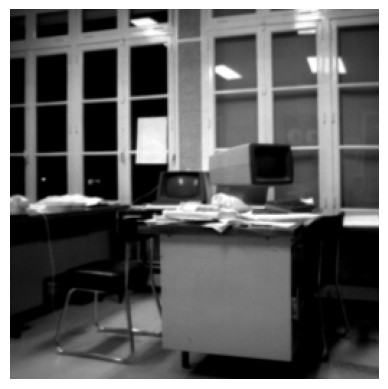

uint8


In [12]:
# leer y visualizar la imagen
image_bureau = read_and_show_image_gray_scale(os.path.join(images_path, "BUREAU.png"))

# comprobar que la imagen tiene 8 bits
print(image_bureau.dtype)

Plano 0


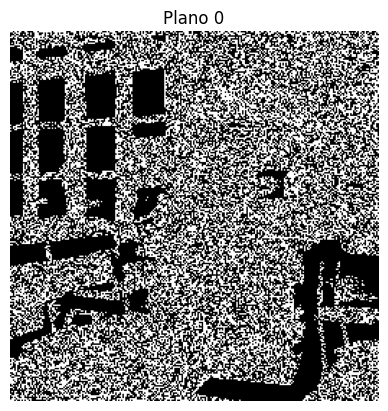

Plano 1


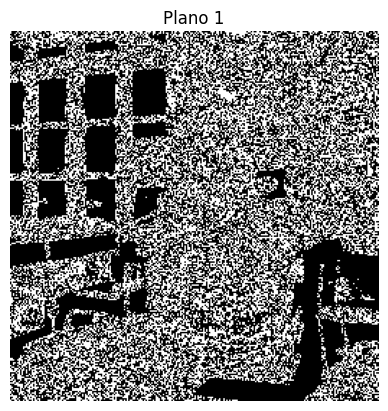

Plano 2


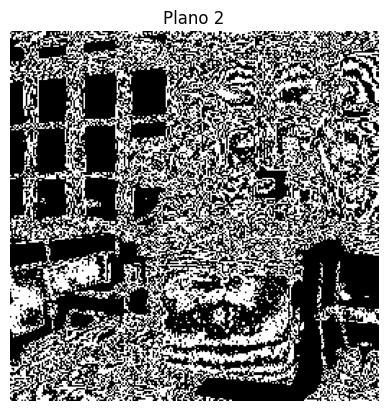

Plano 3


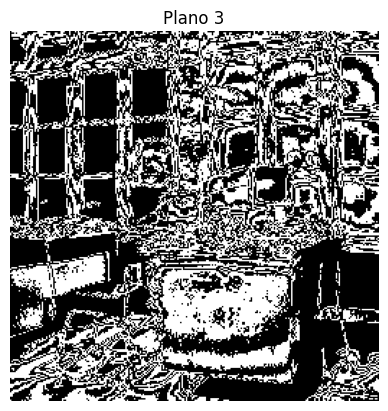

Plano 4


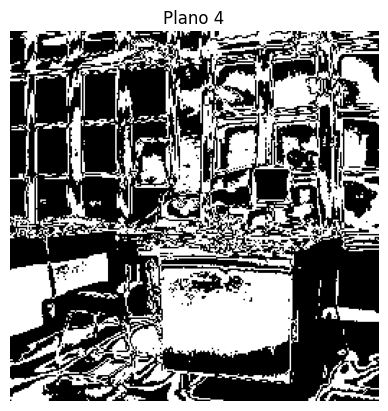

Plano 5


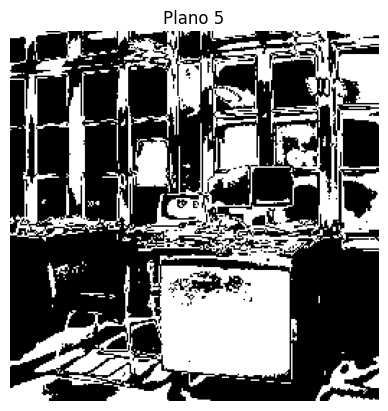

Plano 6


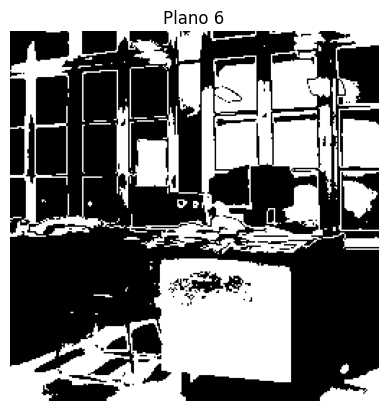

Plano 7


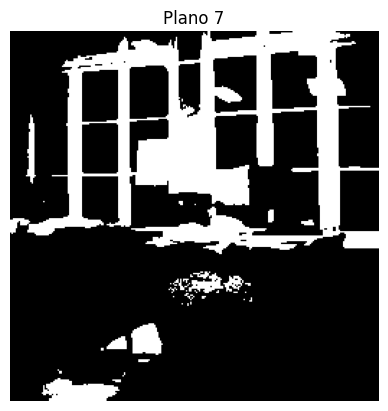

In [13]:
# visualización de los planos binarios
def bit_plane_slicing(imagen: np.ndarray, k: int):
    # crear una nueva matriz tamaño de la imagen original, llena con el valor 2**k, equivalente a llenar de ceros todos los bits excepto el k-ésimo

    # nota: k va de 0 a 7, siendo 0 el bit menos significativo y 7 el más significativo
    plane = np.full((imagen.shape[0], imagen.shape[1]), 2 ** k, np.uint8)
    return cv2.bitwise_and(plane, imagen)

for i in range(8):
    print(f"Plano {i}")
    plane = bit_plane_slicing(image_bureau, i)
    plt.imshow(plane, cmap='gray')
    plt.title(f"Plano {i}")
    plt.axis('off')
    plt.show()

- Identifique el plano más significativo y el menos significativo. ¿Cuál es su conclusión?

    El plano menos significativo es el plano 0 (el de menor peso), ya que en este plano se observa una imagen con mucho ruido y poca información relevante. A medida que se avanza hacia planos de mayor peso, siendo 7 el plano más significativo, la imagen se vuelve más clara, mostrando los contornos y detalles principales de la imagen original, en este caso siendo los contornos de ventanas, muebles y una figura cercana a la ventana izquierda. Esto indica que los planos de mayor peso contienen la mayor parte de la información visual relevante de la imagen.

Bits a poner en cero: 3


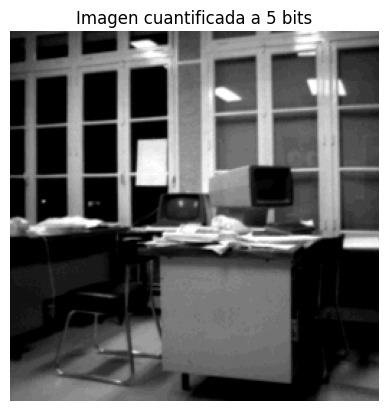

Bits a poner en cero: 5


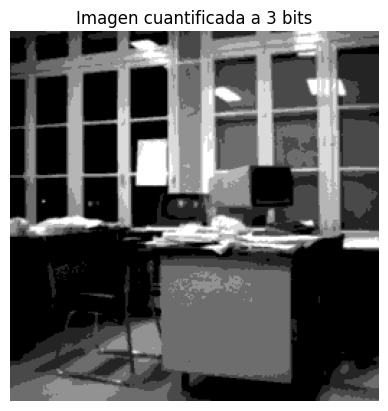

Bits a poner en cero: 7


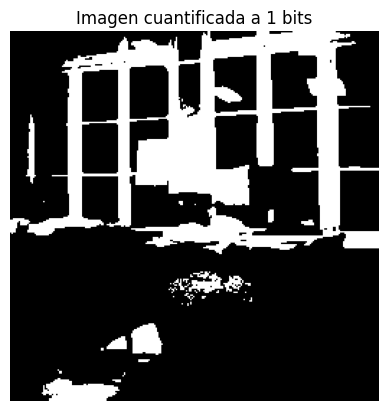

In [14]:
# modificar la cuantificación de la imagen
def image_quantization(imagen: np.ndarray, k: int):
    # funcion capaz de poner en cero el plano binario k de una imagen de 8 bits

    # primero se crea una nueva matriz tamaño de la imagen original, llena con el valor 255 - 2**k, equivalente a poner en cero el bit k-ésimo
    plane = np.full((imagen.shape[0], imagen.shape[1]), 255-2 ** k, np.uint8)
    return cv2.bitwise_and(plane, imagen)

# modificar la cuantificación de la imagen sobre 5, 3 y 1 bits respectivamente
num_bits = [5, 3, 1]
for bits in num_bits:
    bureau_copy = image_bureau.copy()
    colocar_en_cero = 8 - bits
    print("Bits a poner en cero:", colocar_en_cero)

    for i in range(colocar_en_cero): # coloca en cero los 8-k bits menos significativos
        bureau_copy = image_quantization(bureau_copy, i)

    plt.imshow(bureau_copy, cmap='gray')
    plt.title(f"Imagen cuantificada a {bits} bits")
    plt.axis('off')
    plt.show()

- Conclusiones cuantificación.

    Al reducir la cuantificación de la imagen, se hace evidente que la información visual está distribuida de manera desigual entre los diferentes planos binarios, siendo lo planos más significativos los que contienen la mayor parte de la información, preservando estructuras y detalles importantes de la imagen original, mientras que los planos menos significativos contribuyen principalmente a la riqueza tonal y detalles finos. Al eliminar estos últimos de forma progresiva, la imagen va perdiendo calidad visual. Podemos notar como la cuantificación a 3 bits aún conserva una imagen reconocible, con una perdida de detalles y creando fronteras imaginarias entre tonos, pues se obliga a niveles de gris cercanos a colapsar en un mismo valor. 
    En el caso de la cuantificación a 1 bit, la imagen se reduce a una representación binaria muy básica, donde solo se distinguen las áreas más claras y más oscuras, perdiendo casi toda la información visual relevante.

---

# 5. Operaciones lógicas

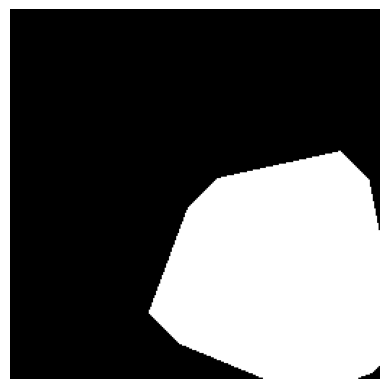

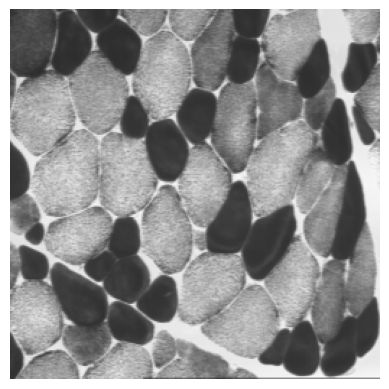

In [7]:
# cargar imagenes spot y muscle
spot_image = read_and_show_image_gray_scale(os.path.join(images_path, 'SPOT.png'))
muscle_image = read_and_show_image_gray_scale(os.path.join(images_path, 'MUSCLE.png'))

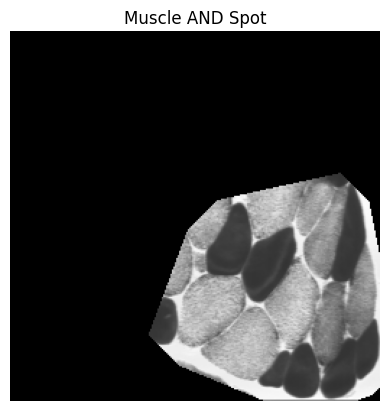

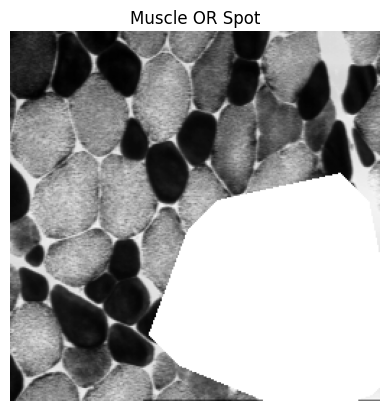

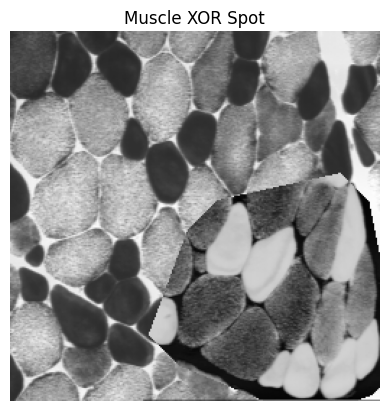

In [8]:
# aplicar las operaciones lógicas AND, OR y XOR entre las dos imágenes
# primera parte: muscle - spot
muscle_and_spot = cv2.bitwise_and(muscle_image, spot_image)
muscle_or_spot = cv2.bitwise_or(muscle_image, spot_image)
muscle_xor_spot = cv2.bitwise_xor(muscle_image, spot_image)

# mostrar resultados
operations = {
    "AND": muscle_and_spot,
    "OR": muscle_or_spot,
    "XOR": muscle_xor_spot
}

for op_name, result_image in operations.items():
    plt.imshow(result_image, cmap='gray')
    plt.title(f"Muscle {op_name} Spot")
    plt.axis('off')
    plt.show()

- ¿Cuál es su conclusión?

    Las funciones lógicas operan comparando los valores binarios de los pixeles en la misma posición. En este caso, al ser SPOT una imagen binaria (solo valores 0 y 255, equivalente a tener ocho bits con valores 00000000 y 11111111 respectivamente), las operaciones lógicas con MUSCLE generan unos tipos de máscaras específicas:

    - MUSCLE AND RONDELLE: Esta operación mantiene los valores de muscle donde SPOT es blanco, pues al tener todos los bits en 1 en esos píxeles, el resultado es igual al valor de MUSCLE. En el resto de la imagen, donde spot es negro, el resultado es negro, pues el valor 0 con cualquier otro en un AND lo vuelve 0.
    - MUSCLE OR RONDELLE: en la operación OR basta co que alguno de los bits sea 1 para que el resultado sea 1. De esta manera, si cualquiera de los dos pixeles de entrada es blanco, el resultado será blanco, como se ve en la imagen. En el área donde SPOT es negro, el resultado sera el mismo que los bits originales de la imagen MUSCLE, pues en sí no se está teniendo ningún cambio al hacer OR con 0s.
    - MUSCLE XOR RONDELLE: en la operación XOR, el valor es 1 si alguno de los dos bits es 1, pero no ambos. Por esta razón, en el fondo negro de SPOT donde todos los bits son 0, el resultado va a ser exactamente a los bits de MUSCLE, pero en la mancha blanca se crea una especie de inversión de los grises, cambiando de 0 a 1 y de 1 a 0 los bits de MUSCLE.

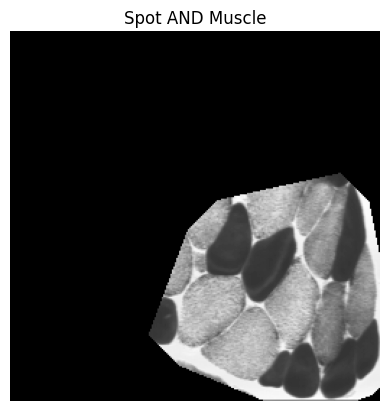

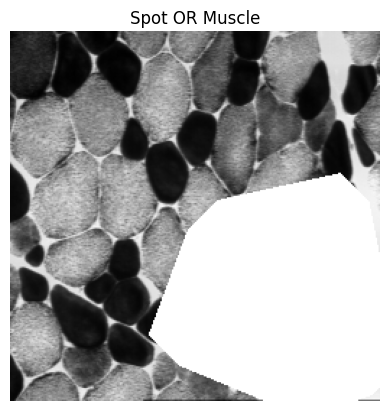

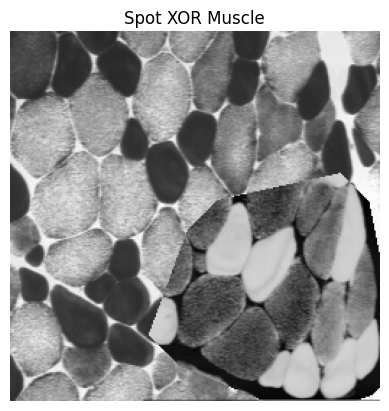

In [101]:
# segunda parte: spot - muscle
spot_and_muscle = cv2.bitwise_and(spot_image, muscle_image)
spot_or_muscle = cv2.bitwise_or(spot_image, muscle_image)
spot_xor_muscle = cv2.bitwise_xor(spot_image, muscle_image)

# mostrar resultados
operations = {
    "AND": spot_and_muscle,
    "OR": spot_or_muscle,
    "XOR": spot_xor_muscle
}

for op_name, result_image in operations.items():
    plt.imshow(result_image, cmap='gray')
    plt.title(f"Spot {op_name} Muscle")
    plt.axis('off')
    plt.show()

- Explique los resultados.

    Se puede observar que el resultado de las operaciones lógicas no se altera con el orden en el que se tomen las imagenes. Esto es devido a que en estas tres operaciones lógicas se cumple la propiedad conmutativa. A diferencia de las operaciones como resta o suma, donde pudimos observar que el orden en el que se realizan afecta el resultado.

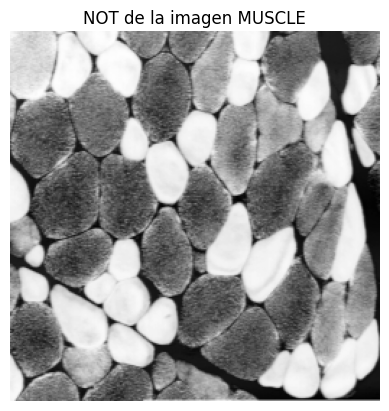

In [9]:
# aplique la operación NOT sobre la imagen MUSCLE
# se puede realizar a través de la operación XOR con una imagen contraste de valor máximo 255 y se efectúa XOR con la imagen original

# crear una imagen de valor 255 del mismo tamaño que MUSCLE
constant_image = np.full(muscle_image.shape, 255, dtype=np.uint8)

# aplicar la operación XOR con MUSCLE
muscle_not = cv2.bitwise_xor(muscle_image, constant_image)

plt.imshow(muscle_not, cmap='gray')
plt.title("NOT de la imagen MUSCLE")
plt.axis('off')
plt.show()

- Explique el resultado.

    Primero, entendamos lo que hace la función XOR con la imagen constante:
    - Si el bit de muscle es 1 -> 1 XOR 1 = 0
    - Si el bit de muscle es 0 -> 0 XOR 1 = 1

    De esta manera, lo que estamos haciendo es exactamente NOT bit de MUSCLE.
    En términos de la imagen podemos observar que se hacer una inversión en tonos, cambiando los tonos claros a oscuros y viceversa, que es exactamente lo que se obtendría al sacar el negativo de la imagen MUSCLE.


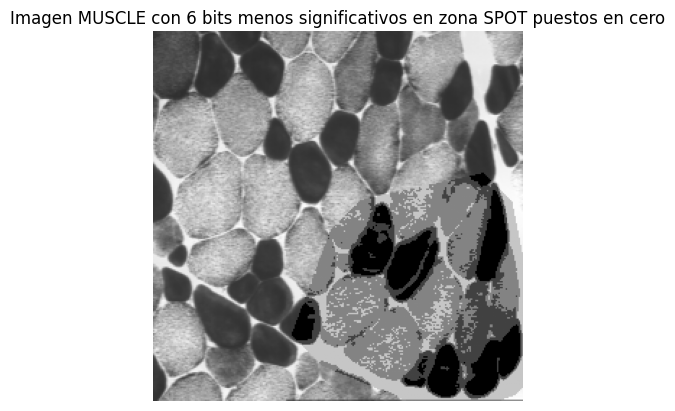

Valores únicos en la zona marcada por SPOT: [  0  64 128 192]


In [15]:
# Ponga en cero en la imagen MUSCLE los 6 bits menos significativos de la zona marcada por SPOT, sin afectar el resto de la imagen.
# verifique que en la imagen resultado, la zona marcada solo toma los cuatro valores 192, 128, 64 y 0.

# primero debemos crear una máscara que seleccione la zona marcada por SPOT en MUSCLE
# esto lo podemos hacer utilizando la operación AND entre MUSCLE y SPOT
mask = cv2.bitwise_and(muscle_image, spot_image)

# a la mascara resultante le ponemos en cero los 6 bits menos significativos
mask_cuantified = mask.copy()
for i in range(6):
    mask_cuantified = image_quantization(mask_cuantified, i)

# seleccionamos la zona de MUSCLE que no está marcada por SPOT, aplicando NOT a SPOT y luego AND con MUSCLE
unchanged_muscle_zone = cv2.bitwise_and(muscle_image, cv2.bitwise_not(spot_image))

# combinamos ambas zonas para obtener la imagen final. Como las zonas no marcadas tienen 0s, se puede hacer con una operación OR
final_image = cv2.bitwise_or(mask_cuantified, unchanged_muscle_zone)

# mostrar la imagen final
plt.imshow(final_image, cmap='gray')
plt.title("Imagen MUSCLE con 6 bits menos significativos en zona SPOT puestos en cero")
plt.axis('off')
plt.show()

# verificar los valores únicos en la zona marcada por SPOT
unique_values = np.unique(final_image[spot_image == 255])
print("Valores únicos en la zona marcada por SPOT:", unique_values)

- Explique el cómo se hace esto.

    Para lograr poner en cero los 6 bits menos significativos de la zona marcada por SPOT, se puede considerar como dividir la imagen MUSCLE en dos regiones: la región dentro de la mancha blanca de SPOT y la región fuera de ella. Para obtener la región dentro de la mancha, la cual se quiere modificar, basta con aplicar la operación AND entre MUSCLE y SPOT, pues todo dentro de lo blanco (bits en 1 en spot) se mantendrán. Para obtener la región fuera de la mancha tal que el resto de la imagen quede en negro, se puede aplicar la operación AND entre MUSCLE y la negación de SPOT (NOT SPOT), pues en esta operación, los bits en 0 de NOT SPOT son el fondo tras la mancha.

    Habiendo separado las dos zonas, se aplica la cuantificación sobre la zona dentro de la mancha colocando en 0 los bits 1 a 6. Con ambos resultados, lo que falta hacer es una "combinación de ambos". Recordando que las zonas no seleccionadas en cada uno quedan en 0, para que se tomen los bits de ambas zonas se puede aplicar una operación OR.

    ---


# 6. Interpolación


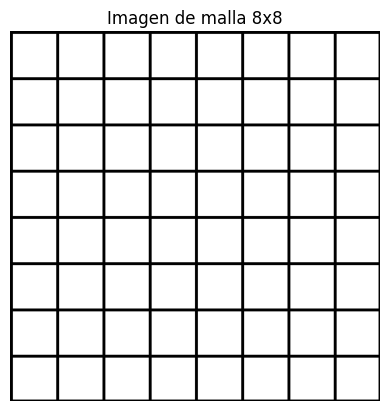

Dimensiones de la imagen de malla: (256, 256)


In [21]:
# generar una imagen de 256x256x1 con una malla 8x8
grid_image = np.full((256, 256), 255, dtype=np.uint8)
quadrant_size = 256//8

for i in range(0, 257, quadrant_size):
    pos = min(i, 255)

    grid_image[pos:pos+2, :] = 0
    grid_image[:, pos:pos+2] = 0

plt.imshow(grid_image, cmap='gray')
plt.title("Imagen de malla 8x8")
plt.axis('off')
plt.show()

print("Dimensiones de la imagen de malla:", grid_image.shape)

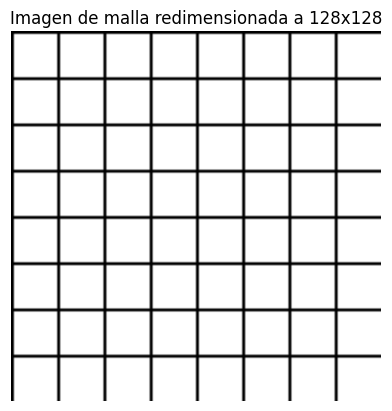

Dimensiones de la imagen redimensionada: (128, 128)


In [22]:
# redimensionar a 128x128
imagen_r =  cv2.resize(grid_image, (128,128), interpolation=cv2.INTER_NEAREST)

plt.imshow(imagen_r, cmap='gray')
plt.title("Imagen de malla redimensionada a 128x128")
plt.axis('off')
plt.show()

print("Dimensiones de la imagen redimensionada:", imagen_r.shape)